# Decision Tree Regresion

##Imports

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns; sns.set()

## Load Data

In [ ]:
archive = files.upload()

In [ ]:
df_features = pd.read_csv('dengue_features_train.csv', sep=',')
df_labels = pd.read_csv('dengue_labels_train.csv', sep=',')

train = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])
test = pd.read_csv('dengue_features_test.csv', sep=',')

train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
def remove_null_values(dataframe):
  if pd.isnull(dataframe).any().any():
    dataframe.fillna(method='ffill', inplace=True)

train.apply(remove_null_values)
test.apply(remove_null_values)

print(pd.isnull(train).any().any())
print(pd.isnull(test).any().any())

False
False


## Decision Tree Algorithm

### Both cities

#### Select Features

In [ ]:
features = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg']

regressor = DecisionTreeRegressor(max_depth=len(features))
regressor.fit(train[features], train['total_cases'])
pd.DataFrame({'Feature': features, 'Decision Tree': regressor.feature_importances_})

,Feature,Decision Tree
0,weekofyear,0.354698
1,ndvi_sw,0.621844
2,reanalysis_specific_humidity_g_per_kg,0.023457


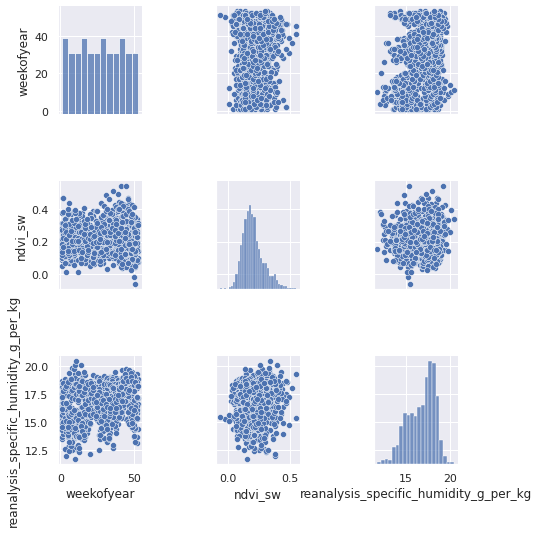

In [ ]:
%matplotlib inline
sns.pairplot(train[features]);

##### Apply Algorithm

In [ ]:
regressor = DecisionTreeRegressor(max_depth=len(features))
regressor.fit(train[features], train['total_cases'])
Y_predict = regressor.predict(test[features])

Y = np.rint(Y_predict)
Y = Y.astype(int)
result = np.hstack(Y)

print(result)

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 92 43 92 92 43 43 92 11 11 92
 43 26 43 43 43 43 92 43 11 11 43 27 27 27 27 27 27 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 23 23 43 43 92 92 43 43
 43 43 43 92 11 26 26 43 43 43 43 92 43 92 43 43 27 27 27 27 27 27 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 23 23 23 23 23 23 23 23 23 23 43
 43 92 43 43 43 43 43 43 43 11 92 43 43 43 92 43 26 92 43 43 27 27 27 27
 27 27 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 23 23 23 23 23
 12 23 23 26 92 43 43 43 43 43 11 11 43 43 43 43 43 43 43 92 92 43 43 43
 27 27 27 27 27 27 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 23 12 43 43 43 43 92 26 26 43 43 43 43 43 43 43 43 43 43
 43 43 43 27 27 27 27 27 27 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 11 26 11 11 43 11 11 11 11 11 11 26 92 11 43 11 26 26 11 26 11 27
 13 13 27 13 13 12 23 23 12 12 23 23 23 12 12 23 23 12 12 12 12 12 12 12
 12 12 12 12 12 12 11 11 11 11 26 43 11 11 11 11 11

##### Output

In [ ]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': result})

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,12
2,sj,2008,20,12
3,sj,2008,21,12
4,sj,2008,22,12


### Divided By Cities

In [ ]:
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']

test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

##### MAE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train_size=80
shuffle = False

X_test_sample_SJ, X_train_sample_SJ = train_test_split(train_sj, train_size=train_size,random_state=1, shuffle=shuffle)
Y_train_sample_SJ = train_test_split(train_sj, train_size=train_size,random_state=1, shuffle=shuffle)
X_test_sample_IQ, X_train_sample_IQ = train_test_split(train_iq, train_size=train_size,random_state=1, shuffle=shuffle)
Y_train_sample_IQ = train_test_split(train_iq,train_size=train_size,random_state=1, shuffle=shuffle)

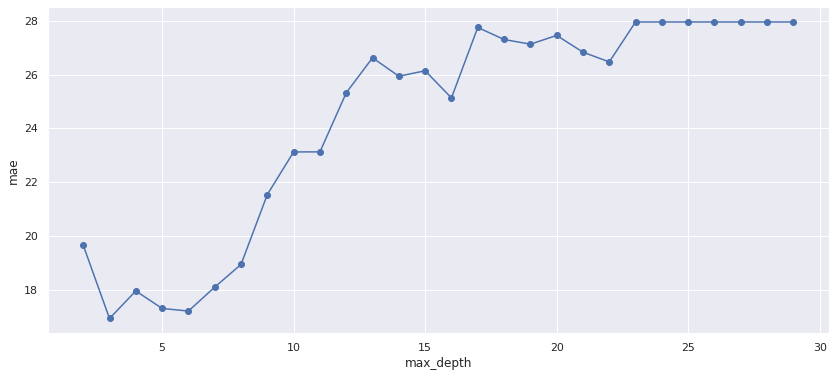

In [ ]:
# SJ

features = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg']

mae = []

for i in range(2, 30):
    regressor = DecisionTreeRegressor(criterion='mse', max_depth=i, random_state=0, splitter='best')
    regressor.fit(X_train_sample_SJ[features], X_train_sample_SJ['total_cases'])
    pred_values = regressor.predict(X_test_sample_SJ[features])
    maev = mean_absolute_error(X_test_sample_SJ['total_cases'],pred_values)
    mae.append(maev)

# Plot mae
plt.figure(figsize=(14,6))
plt.plot(range(2,30), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

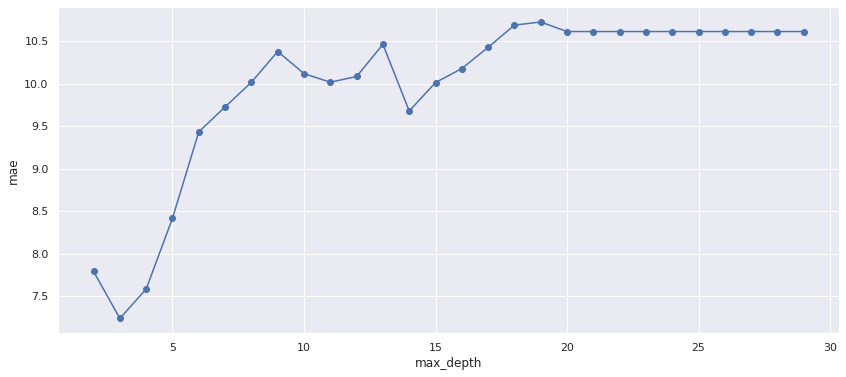

In [ ]:
# IQ

features = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c']

mae = []

for i in range(2, 30):
    regressor = DecisionTreeRegressor(criterion='mse', max_depth=i, random_state=0, splitter='best')
    regressor.fit(X_train_sample_IQ[features], X_train_sample_IQ['total_cases'])
    pred_values = regressor.predict(X_test_sample_IQ[features])
    maev = mean_absolute_error(X_test_sample_IQ['total_cases'],pred_values)
    mae.append(maev)

# Plot mae
plt.figure(figsize=(14,6))
plt.plot(range(2,30), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

#### San Juan

##### Select Features

In [ ]:
features_sj = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg']

regressor_sj = DecisionTreeRegressor(max_depth=len(features_sj))
regressor_sj.fit(train_sj[features_sj], train_sj['total_cases'])
pd.DataFrame({'Feature': features_sj, 'Decision Tree': regressor_sj.feature_importances_})

,Feature,Decision Tree
0,weekofyear,0.214504
1,ndvi_sw,0.722324
2,reanalysis_specific_humidity_g_per_kg,0.063173


In [ ]:
'''year	      weekofyear	      week_start_date	
ndvi_ne	        ndvi_nw	        ndvi_se	        ndvi_sw	
precipitation_amt_mm	
reanalysis_air_temp_k	        reanalysis_avg_temp_k	        reanalysis_dew_point_temp_k	        reanalysis_max_air_temp_k	
reanalysis_min_air_temp_k	        reanalysis_precip_amt_kg_per_m2	        reanalysis_relative_humidity_percent	       reanalysis_sat_precip_amt_mm	
reanalysis_specific_humidity_g_per_kg	                station_avg_temp_c	
reanalysis_tdtr_k	      station_diur_temp_rng_c	      station_max_temp_c	        station_min_temp_c	     station_precip_mm'''



'''features_sj =  ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg','year', 'ndvi_se']

regressor_sj = DecisionTreeRegressor(max_depth=len(features_sj))
regressor_sj.fit(train_sj[features_sj], train_sj['total_cases'])
pd.DataFrame({'Feature': features_sj, 'Decision Tree': regressor_sj.feature_importances_})'''

"features_sj =  ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg','year', 'ndvi_se']\n\nregressor_sj = DecisionTreeRegressor(max_depth=len(features_sj))\nregressor_sj.fit(train_sj[features_sj], train_sj['total_cases'])\npd.DataFrame({'Feature': features_sj, 'Decision Tree': regressor_sj.feature_importances_})"

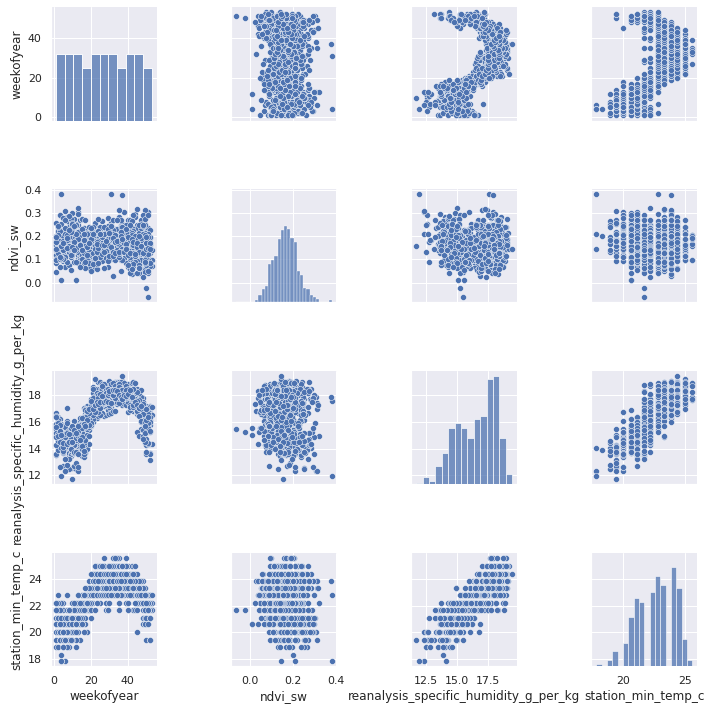

In [ ]:
%matplotlib inline
sns.pairplot(train_sj[features]);

##### Apply Algorithm

In [ ]:
regressor_sj = DecisionTreeRegressor(max_depth=len(features_sj))
regressor_sj.fit(train_sj[features_sj], train_sj['total_cases'])
Y_predict_sj = regressor_sj.predict(test_sj[features_sj])

Y_sj = np.rint(Y_predict_sj)
Y_sj = Y_sj.astype(int)
result_sj = np.hstack(Y_sj)

result_sj

array([ 15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        43,  44,  43,  44,  44, 168,  43,  44,  44,  44,  44,  43,  44,
        43,  43,  43,  43,  44,  43,  44,  44,  43,  27,  27,  27,  27,
        43,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  44,
        43,  43,  43,  44,  44,  43,  43,  43,  43,  43,  44,  44,  44,
        44,  43,  43,  43,  43,  44,  43,  44,  43,  43,  43,  43,  43,
        43,  27,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  44,  44,  44,  44,  44,  44,  44,  44,
        44,  44, 168,  43,  44, 168, 168, 168,  43,  43,  43, 168,  44,
        44,  43,  43,  43,  44,  43,  44,  44,  43,  43,  27,  43,  43,
        27,  27,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  44,  44,  44,  44,  44,  15,
        44,  44,  44,  44, 168,  43,  43,  43,  43,  44,  44,  4

####Iquitos

##### Select Features

In [ ]:
features_iq = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c']

regressor_iq = DecisionTreeRegressor(max_depth=len(features_iq))
regressor_iq.fit(train_iq[features_iq], train_iq['total_cases'])
pd.DataFrame({'Feature': features_iq, 'Decision Tree': regressor_iq.feature_importances_})

,Feature,Decision Tree
0,weekofyear,0.233420
1,ndvi_sw,0.196276
2,reanalysis_specific_humidity_g_per_kg,0.441176
3,station_min_temp_c,0.129128


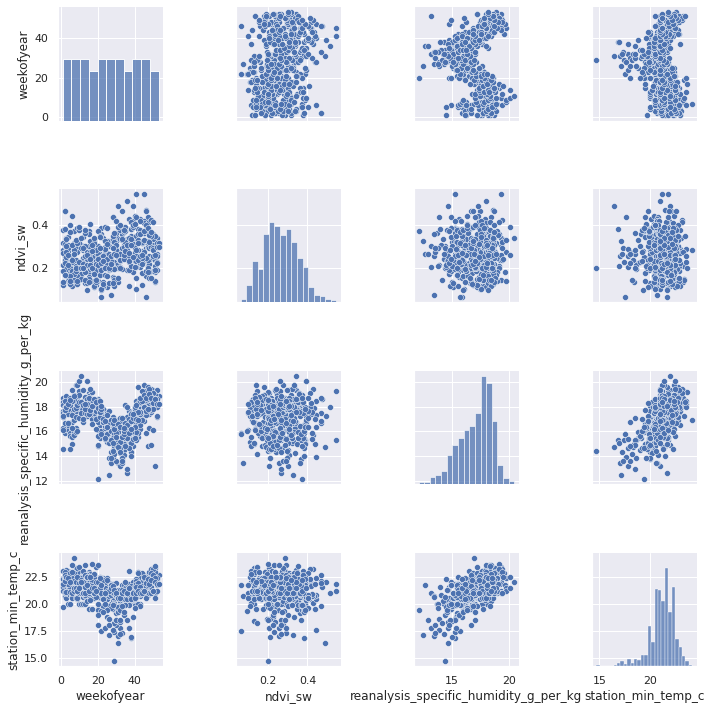

In [ ]:
%matplotlib inline
sns.pairplot(train_iq[features]);

##### Apply Algorithm

In [ ]:
regressor_iq = DecisionTreeRegressor(max_depth=len(features_iq))
regressor_iq.fit(train_iq[features_iq], train_iq['total_cases'])
Y_predict_iq = regressor_iq.predict(test_iq[features_iq])

Y_iq = np.rint(Y_predict_iq)
Y_iq = Y_iq.astype(int)
result_iq = np.hstack(Y_iq)

#### Result

In [ ]:
final_result = np.append(result_sj, result_iq,axis=None)
final_result

array([ 15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        43,  44,  43,  44,  44, 168,  43,  44,  44,  44,  44,  43,  44,
        43,  43,  43,  43,  44,  43,  44,  44,  43,  27,  27,  27,  27,
        43,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  44,
        43,  43,  43,  44,  44,  43,  43,  43,  43,  43,  44,  44,  44,
        44,  43,  43,  43,  43,  44,  43,  44,  43,  43,  43,  43,  43,
        43,  27,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  44,  44,  44,  44,  44,  44,  44,  44,
        44,  44, 168,  43,  44, 168, 168, 168,  43,  43,  43, 168,  44,
        44,  43,  43,  43,  44,  43,  44,  44,  43,  43,  27,  43,  43,
        27,  27,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  44,  44,  44,  44,  44,  15,
        44,  44,  44,  44, 168,  43,  43,  43,  43,  44,  44,  4

#### Output

In [ ]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': result})

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,12
2,sj,2008,20,12
3,sj,2008,21,12
4,sj,2008,22,12


## Points


---
POINTS: 25.7284

FEATURES: ['weekofyear', 'station_max_temp_c', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_min_air_temp_k']

---
POINTS: 25.2788

FEATURES: ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_min_air_temp_k']

---
POINTS: 25.6058

FEATURES: ['weekofyear', 'ndvi_sw', 'ndvi_se', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_min_air_temp_k']

---

POINTS: 25.1587

FEATURES:
  
>  SAN JUAN: ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg']
  
>  IQUITOS: ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c']